# Apriori

In [28]:
import pandas as pd
import numpy as np

In [110]:
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="Table 1")

In [111]:
df

,"whole milk,pastry,salty snack"
0,"sausage,whole milk,semi-finished bread,yogurt ..."
1,"canned beer,misc. beverages sausage,hygiene ar..."
2,"beef,white bread butter,whole milk"
3,"frozen vegetables,other vegetables tropical fr..."
4,"butter milk,specialty chocolate frozen meals,d..."
5,"root vegetables,detergent sausage,rolls/buns"
6,"dish cleaner,cling film/bags"


In [57]:
df.sum()

whole milk,pastry,salty snack    sausage,whole milk,semi-finished bread,yogurt ...
dtype: object

In [69]:
from itertools import combinations

rules = list(combinations(["whole milk,pastry,salty snack, sausage,whole milk,semi-finished bread,yogurt, soda,pickled vegetables, canned beer,misc. beverages, sausage,hygiene articles, sausage,whole milk,rolls/buns, whole milk,soda, frankfurter,soda,whipped/sour cream,frankfurter,curd, beef,white bread, butter,whole milk, frozen vegetables,other vegetables, tropical fruit,sugar. butter milk,specialty chocolate, frozen meals,dental care, rolls/buns,rolls/buns, root vegetables,detergent, sausage,rolls/buns, dish cleaner,cling film/bags"], 4))
rules

[]

In [63]:
rule_baru = []
for rule in rules:
  if len(df[(df[rules[0]]==1) & (df[rules[1]]==1)]) >0:
      rule_baru.append(rules)
rule_baru

KeyError: ignored

In [64]:
hitung = {}
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{}

In [65]:
len(df)

7

In [66]:
print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---


In [112]:
df["salty snack"].sum()

KeyError: ignored

In [27]:
print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---


# *KNN*

In [107]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
df = pd.read_csv('deteksi_uang_palsu.csv')

In [71]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


<Axes: xlabel='diagonal', ylabel='count'>

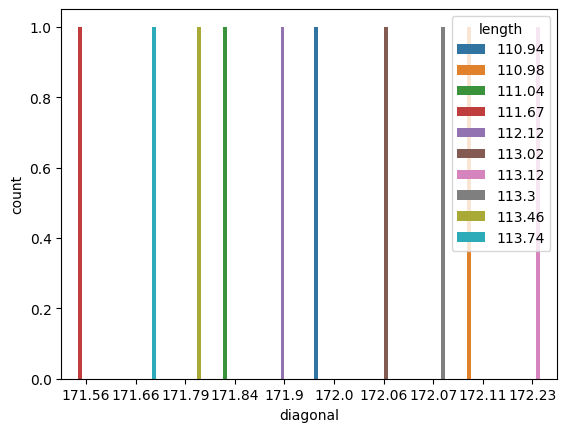

In [75]:
sns.countplot(data=df,x="diagonal",hue="length")

In [76]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [77]:
df3 = pd.get_dummies(df)

In [78]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [79]:
df3

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [89]:
TARGET = df3.is_genuine #Kolom penentu target prediksi
data = df3.drop(columns=["is_genuine"])

In [90]:
sample = data.sample()

In [91]:
sample

,diagonal,height_left,height_right,margin_low,margin_up,length
3,172.07,104.21,103.82,4.29,3.35,113.3


In [92]:
knn = KNeighborsClassifier()

In [93]:
knn = knn.fit(data,TARGET)

In [94]:
sample

,diagonal,height_left,height_right,margin_low,margin_up,length
3,172.07,104.21,103.82,4.29,3.35,113.3


In [95]:
knn.predict(sample)

array([ True])

In [96]:
sample2 = df3.sample()

In [97]:
sample2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
5,False,172.0,104.23,104.52,5.76,3.37,110.94


In [99]:
sample2.drop(columns=["is_genuine"])

,diagonal,height_left,height_right,margin_low,margin_up,length
5,172.0,104.23,104.52,5.76,3.37,110.94


In [100]:
knn.predict(sample2.drop(columns=["is_genuine"]))

array([False])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, TARGET, test_size=0.33, random_state=42)

In [103]:
knn2=KNeighborsClassifier().fit(X_train,y_train)

In [104]:
X_test

,diagonal,height_left,height_right,margin_low,margin_up,length
8,171.84,104.06,104.10,4.87,3.25,111.04
1,171.66,103.68,103.41,4.35,3.33,113.74
5,172.00,104.23,104.52,5.76,3.37,110.94
0,172.06,104.24,103.66,4.24,3.10,113.02


In [105]:
y_test

8    False
1     True
5    False
0     True
Name: is_genuine, dtype: bool

In [106]:
knn2.predict(X_test)

array([False,  True, False,  True])

In [108]:
accuracy_score(knn2.predict(X_test),y_test)

1.0

# Analisis

  ### Nama : Aida Nurjannah
  ### NIM  : 2109116032

  Tema yang saya pilih adalah pendidikan dimana dataset ini bertujuan untuk memberikan prediksi mahasiswa yang lulus atau terdropout dari sebuah universitas beberapa tahun terakhir

In [113]:
df = pd.read_csv("student.csv")

In [114]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [116]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [117]:
df.sum()

Marital status                                                                                 5214
Application mode                                                                              30468
Application order                                                                              7644
Course                                                                                        43794
Daytime/evening attendance                                                                     3941
Previous qualification                                                                        11199
Nacionality                                                                                    5550
Mother's qualification                                                                        54513
Father's qualification                                                                        72798
Mother's occupation                                                                           32374


<Axes: xlabel='Nacionality', ylabel='count'>

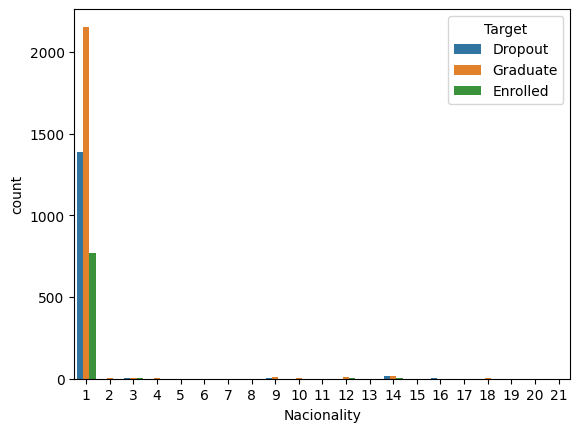

In [120]:
sns.countplot(data=df,x="Nacionality",hue="Target")

In [121]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [123]:
dfd = pd.get_dummies(df)
dfd

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,0,0,1
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,0,0,1
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,1,0,0
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,1,0,0
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,0,0,1


In [125]:
TARGET = dfd.Nacionality
data = dfd.drop(columns=["Nacionality"])

sample = data.sample()
sample

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
2771,1,1,4,12,1,1,22,27,10,10,...,8,8,13.045,0,9.4,-0.8,-3.12,0,0,1


In [126]:
knn = KNeighborsClassifier()

In [127]:
knn = knn.fit(data,TARGET)

In [128]:
knn.predict(sample)

array([1])

In [129]:
sample2 = dfd.sample()
sample

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
2771,1,1,4,12,1,1,22,27,10,10,...,8,8,13.045,0,9.4,-0.8,-3.12,0,0,1


In [131]:
sample2.drop(columns=["Nacionality"])
knn.predict(sample2.drop(columns=["Nacionality"]))

array([1])

In [132]:
knn2=KNeighborsClassifier().fit(X_train,y_train)

In [133]:
X_test

,diagonal,height_left,height_right,margin_low,margin_up,length
8,171.84,104.06,104.10,4.87,3.25,111.04
1,171.66,103.68,103.41,4.35,3.33,113.74
5,172.00,104.23,104.52,5.76,3.37,110.94
0,172.06,104.24,103.66,4.24,3.10,113.02


In [134]:
y_test

8    False
1     True
5    False
0     True
Name: is_genuine, dtype: bool

In [135]:
knn2.predict(X_test)

array([False,  True, False,  True])

In [136]:
accuracy_score(knn2.predict(X_test),y_test)

1.0